## Test Set Augmentations

#### This notebook contains the code to augment the test set of the experiment

In [12]:
# code adapted from https://www.machinelearningmindset.com/data-augmentation-with-tensorflow/

import matplotlib.image as mpimg
import tensorflow as tf
import urllib

import matplotlib.pyplot as plt
import numpy as np

(500, 375, 3)


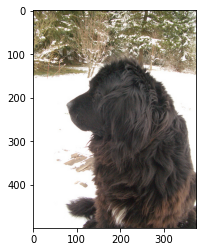

In [6]:
# visualize random image

image_name = (
    "/mnt/c/Users/pietr/Desktop/ImageNet/DATA/testing/val252_1/ILSVRC2012_val_00000045.JPEG"
)

image = mpimg.imread(image_name)
imgplot = plt.imshow(image)

print(image.shape)

In [7]:
# Side by side visualization


def visualize(im, imAgmented, operation):
    '''
    Method to visualize original and edited images side to side
    '''
    fig = plt.figure(figsize=(16, 10))
    plt.subplot(1, 2, 1)
    plt.title("Original image")
    plt.imshow(im)
    plt.subplot(1, 2, 2)
    plt.title(operation)
    plt.imshow(imAgmented)
    return imAgmented

2022-05-28 14:44:42.340924: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-05-28 14:44:44.455251: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-28 14:44:44.462076: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 Laptop GPU computeCapability: 8.6
coreClock: 1.057GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 163.94GiB/s
2022-05-28 14:44:44.462164: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-05-28 14:44:44.527590: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-05-28 14:44:44.527864: I tensorflow/str

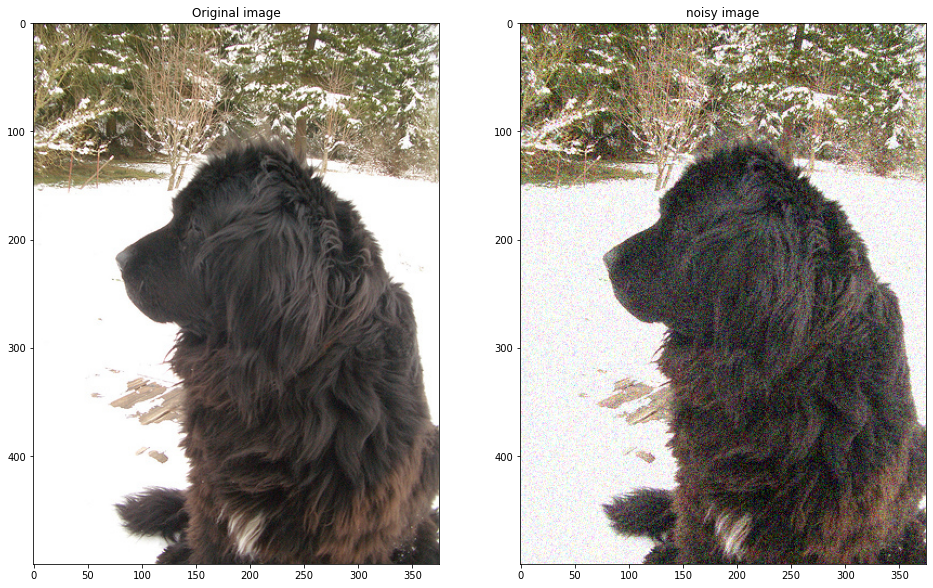

In [8]:
# Adding Gaussian noise to image and visualize difference

common_type = tf.float32  # Make noise and image of the same type
gnoise = tf.random.normal(
    shape=tf.shape(image), mean=0.0, stddev=0.1, dtype=common_type
)

image_type_converted = tf.image.convert_image_dtype(
    image, dtype=common_type, saturate=False
)

noisy_image = tf.add(image_type_converted, gnoise)
noisied = visualize(image_type_converted, noisy_image, "noisy image")

<tf.Tensor: shape=(300, 225, 3), dtype=uint8, numpy=
array([[[ 64,  59,  30],
        [ 79,  62,  54],
        [140, 123, 116],
        ...,
        [178, 156, 143],
        [245, 237, 224],
        [231, 223, 202]],

       [[ 73,  61,  35],
        [ 40,  42,  28],
        [130, 136, 122],
        ...,
        [178, 165, 131],
        [185, 178, 152],
        [130, 129, 101]],

       [[ 70,  54,  31],
        [ 63,  54,  39],
        [ 58,  54,  42],
        ...,
        [130, 118,  92],
        [138, 122,  99],
        [184, 136, 126]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 77,  56,  65],
        [ 62,  53,  58],
        [ 52,  47,  44]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 64,  59,  66],
        [ 60,  48,  60],
        [ 51,  36,  43]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 68,  69,  6

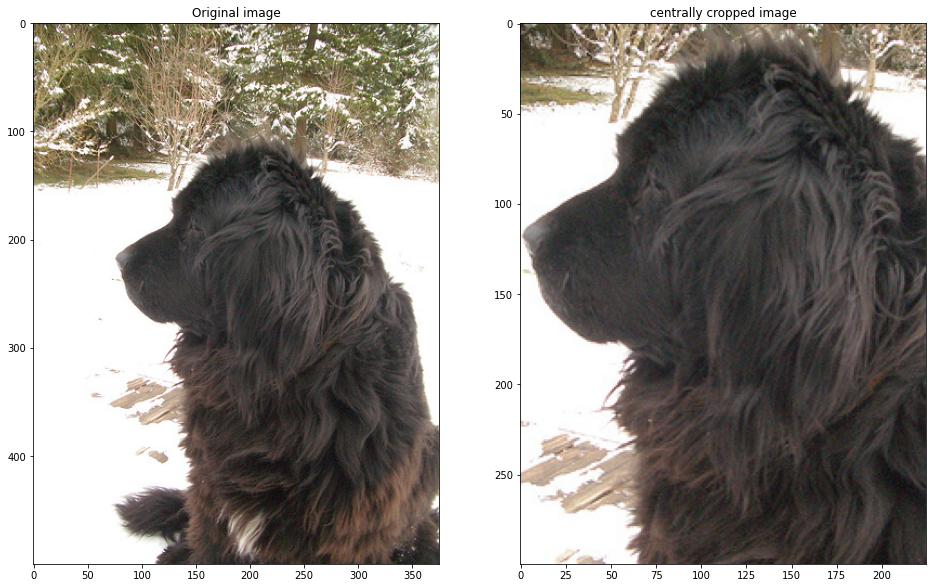

In [9]:
# visualize central cropped version

central_fraction = 0.6  # The scale of the cropped area to the original image
center_cropped = tf.image.central_crop(image, central_fraction=0.6)
visualize(image, center_cropped, "centrally cropped image")

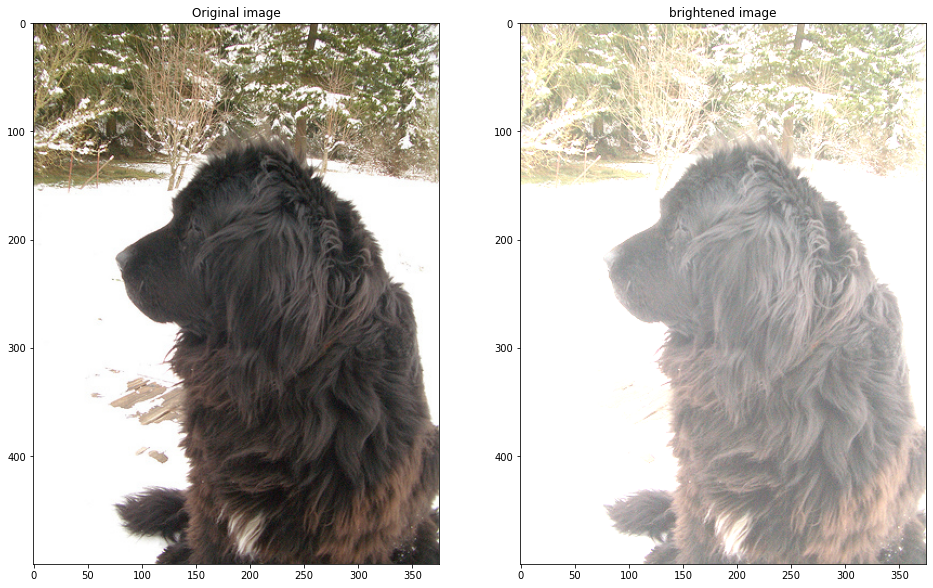

In [10]:
# visualize brighter version

bright = tf.image.adjust_brightness(image, 0.4)
brightened = visualize(image, bright, "brightened image")

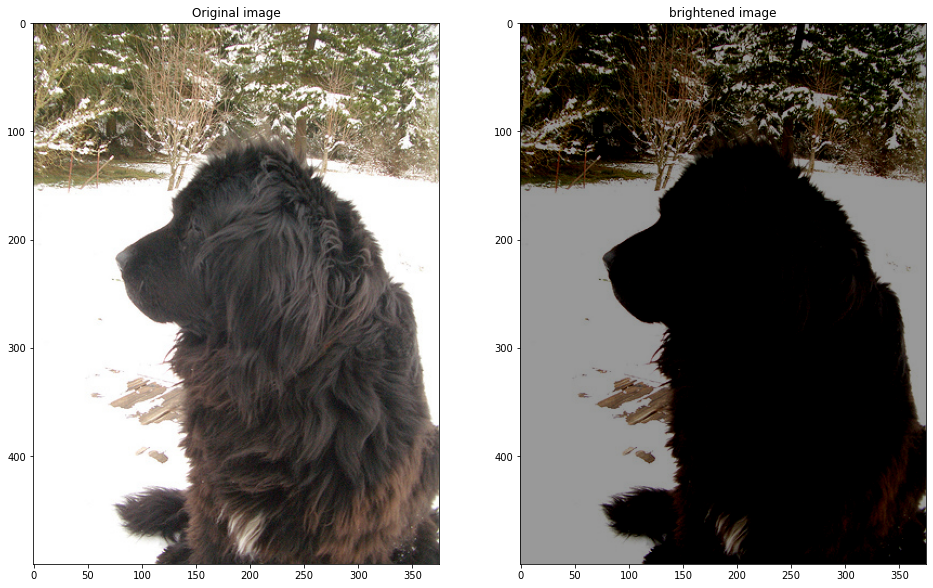

In [11]:
# visualize darker version

dark = tf.image.adjust_brightness(image, -0.4)
darkened = visualize(image, dark, "brightened image")